In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Pre C-19 listings - 2/13/2020

In [2]:
csv = 'la_airbnb_02_13_2020_listings.csv'

In [3]:
df = pd.read_csv(csv)

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98209,-118.38494,Entire home/apt,122,30,2,2016-05-15,0.02,1,0
1,344,Family perfect;Pool;Near Studios!,767,Melissa,Other Cities,Burbank,34.16562,-118.33458,Entire home/apt,168,2,8,2019-10-19,0.18,1,119
2,2708,Mirrored Mini-Suite with Fireplace - W. Hollywood,3008,Chas.,City of Los Angeles,Hollywood,34.09768,-118.34602,Private room,79,30,23,2019-12-12,0.33,2,304
3,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00475,-118.48127,Private room,140,1,21,2019-12-27,0.20,2,337
4,2864,*Upscale Professional Home with Beautiful Studio*,3207,Bernadine,Other Cities,Bellflower,33.87619,-118.11397,Entire home/apt,80,2,0,NaN,NaN,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38851 entries, 0 to 38850
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38851 non-null  int64  
 1   name                            38849 non-null  object 
 2   host_id                         38851 non-null  int64  
 3   host_name                       38849 non-null  object 
 4   neighbourhood_group             38851 non-null  object 
 5   neighbourhood                   38851 non-null  object 
 6   latitude                        38851 non-null  float64
 7   longitude                       38851 non-null  float64
 8   room_type                       38851 non-null  object 
 9   price                           38851 non-null  int64  
 10  minimum_nights                  38851 non-null  int64  
 11  number_of_reviews               38851 non-null  int64  
 12  last_review                     

In [8]:
df.shape

(38851, 16)

In [19]:
c = df.columns
c

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [10]:
df['neighbourhood_group'].value_counts()

City of Los Angeles     22890
Other Cities            13093
Unincorporated Areas     2868
Name: neighbourhood_group, dtype: int64

In [11]:
df['neighbourhood'].value_counts(sort=True)

Venice                  1971
Hollywood               1931
Long Beach              1793
Downtown                1403
Santa Monica            1298
                        ... 
Cudahy                     1
Ridge Route                1
Chatsworth Reservoir       1
Hawaiian Gardens           1
South Diamond Bar          1
Name: neighbourhood, Length: 264, dtype: int64

In [12]:
df['neighbourhood'].value_counts(normalize=True)

Venice                  0.050732
Hollywood               0.049703
Long Beach              0.046151
Downtown                0.036112
Santa Monica            0.033410
                          ...   
Cudahy                  0.000026
Ridge Route             0.000026
Chatsworth Reservoir    0.000026
Hawaiian Gardens        0.000026
South Diamond Bar       0.000026
Name: neighbourhood, Length: 264, dtype: float64

In [13]:
exp_nbh = df[['neighbourhood', 'price']]
exp_nbh.shape

(38851, 2)

In [15]:
len(df.columns)

16

In [16]:
df.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7680
reviews_per_month                 7680
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [17]:
df.fillna({'name': 'no_name'}, inplace=True)
df.fillna({'host_name': 'no_name'}, inplace=True)
df.fillna({'last_review': 'not_reviewed'}, inplace=True)
df.fillna({'reviews_per_month': 0}, inplace=True)

In [20]:
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [21]:
df['price'].describe()

count    38851.000000
mean       226.858742
std        655.188690
min          0.000000
25%         70.000000
50%        110.000000
75%        190.000000
max      22000.000000
Name: price, dtype: float64

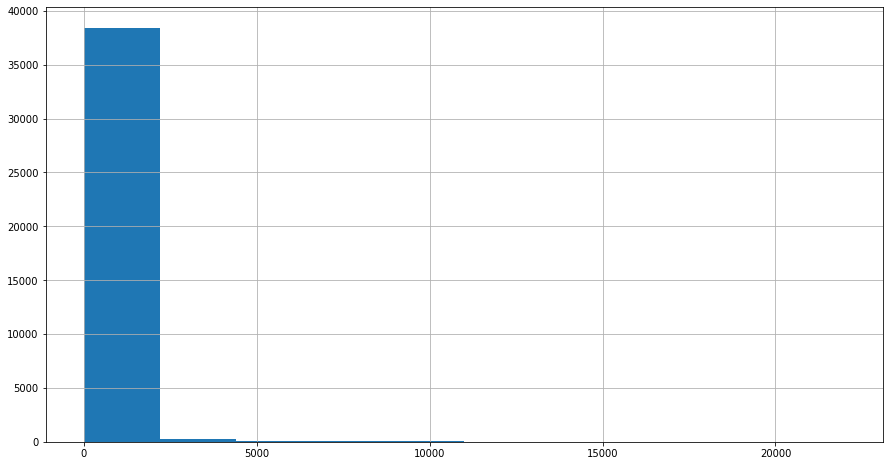

In [25]:
#Plot distribution or price
fig = plt.figure(figsize= (15, 8))
hist_price = df['price'].hist()
#We can see that most listings are below $1000

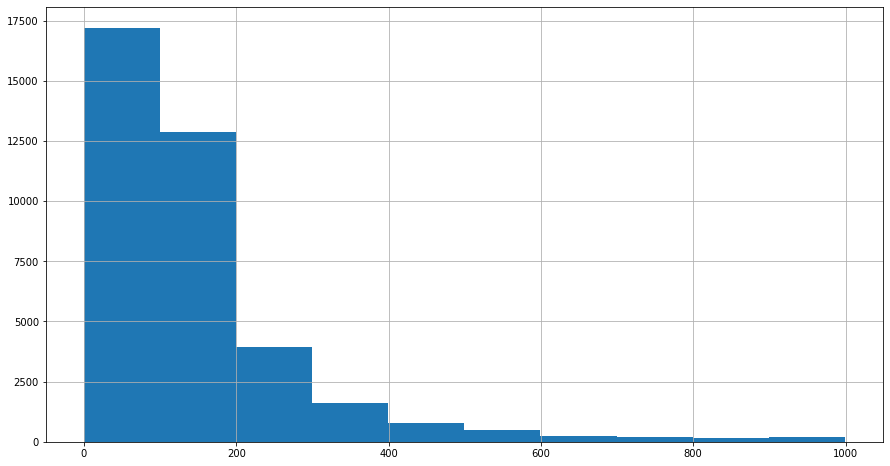

In [26]:
#Distribution of of price below $1000
fig = plt.figure(figsize= (15, 8))
hist_price1 = df['price'][df['price']<1000].hist()

In [27]:
#Lets find out how many listings are about 1000
len(df[df['price']>1000])
#For the analysis, lets treat these as outliers and remove them.

963

# Analysis of AirBnB listings below $300

In [29]:
#Lets set a threshold of $300
feb = df[df['price']<300]
len(feb)

33995

Text(0, 0.5, 'Listings')

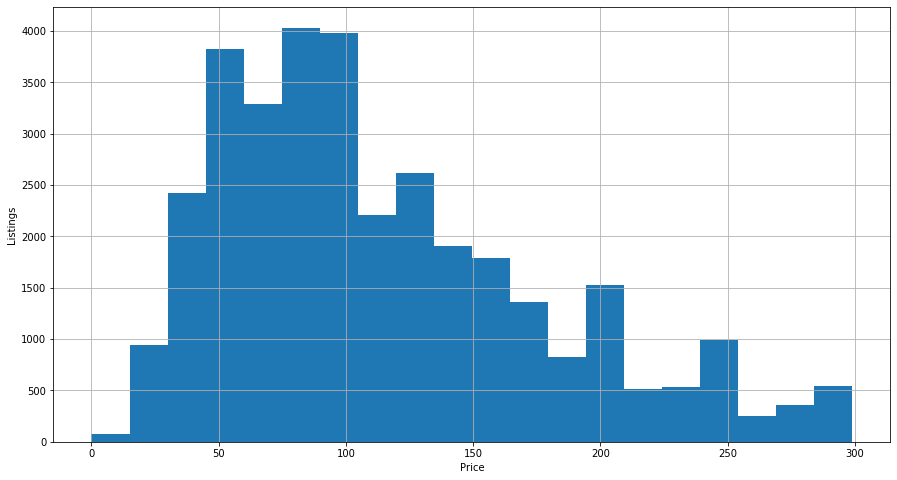

In [37]:
fig = plt.figure(figsize= (15, 8))
feb_hist = feb['price'][feb['price']<300].hist(bins=20)
plt.xlabel('Price')
plt.ylabel('Listings')

In [38]:
feb['price'].describe()

count    33995.000000
mean       113.350051
std         64.053370
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

In [39]:
feb['neighbourhood'].value_counts()

Hollywood               1782
Long Beach              1687
Venice                  1535
Downtown                1224
Santa Monica            1135
                        ... 
Chatsworth Reservoir       1
Ridge Route                1
Lake Hughes                1
Hawaiian Gardens           1
Cudahy                     1
Name: neighbourhood, Length: 264, dtype: int64

In [45]:
pct_areas = feb['neighbourhood'].value_counts(normalize=True).mul(100).round(3)
pct_areas = pd.DataFrame(pct_areas)
pct_areas

,neighbourhood
Hollywood,5.242
Long Beach,4.962
Venice,4.515
Downtown,3.601
Santa Monica,3.339
...,...
Chatsworth Reservoir,0.003
Ridge Route,0.003
Lake Hughes,0.003
Hawaiian Gardens,0.003


In [48]:
nb_avg_prices = feb.groupby('neighbourhood')['price'].mean().round(3)
nb_avg_prices = pd.DataFrame(nb_avg_prices)
nb_avg_prices

,price
neighbourhood,
Acton,109.800
Adams-Normandie,82.745
Agoura Hills,107.757
Agua Dulce,92.636
Alhambra,87.864
...,...
Willowbrook,111.000
Wilmington,63.029
Windsor Square,112.459


In [49]:
#What is the max amount of listings one host has
host_id = feb.groupby(['host_id'])
max(host_id.size())

207

In [50]:
host_id.size().value_counts()

1      15603
2       2477
3        926
4        456
5        229
6        172
7         80
8         65
9         58
10        44
12        25
11        20
13        20
14        18
15        15
18        13
19         9
16         8
20         7
17         7
23         7
41         6
21         5
24         4
32         4
30         4
28         4
31         2
37         2
25         2
33         1
49         1
67         1
66         1
29         1
35         1
51         1
61         1
68         1
59         1
36         1
27         1
53         1
74         1
22         1
38         1
54         1
47         1
39         1
26         1
200        1
73         1
207        1
dtype: int64

In [51]:
#Get the host_id of the host with the maximum listings
id_counts = feb['host_id'].value_counts()
max_host = id_counts.idxmax()
max_host

48005494

In [52]:
#What are the listings of host_id '48005494'
host_max = feb[feb['host_id']==48005494]
host_max.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19321,25320272,1 Bedroom Condo in Mar Vista,48005494,Zeus,City of Los Angeles,Mar Vista,33.99983,-118.42288,Entire home/apt,97,30,3,2019-07-22,0.31,215,55
19482,25543236,2 Bedroom Townhouse in Silicon Beach,48005494,Zeus,City of Los Angeles,Venice,33.97897,-118.46243,Entire home/apt,271,31,5,2018-12-27,0.26,215,319
19483,25545020,Conveniently Located LA Studio,48005494,Zeus,City of Los Angeles,Mar Vista,34.00391,-118.43505,Entire home/apt,121,30,1,2018-10-17,0.06,215,0
19484,25545539,Santa Monica 2 Bedroom Apt Near (Hidden by Air...,48005494,Zeus,Other Cities,Santa Monica,34.02784,-118.49373,Entire home/apt,256,31,0,not_reviewed,0.00,215,95
19486,25545883,Santa Monica 2 Bedroom Apt Near YouTube,48005494,Zeus,Other Cities,Santa Monica,34.02692,-118.49276,Entire home/apt,243,31,3,2019-10-21,0.47,215,41


In [53]:
host_max['price'].describe()

count    207.000000
mean     185.661836
std       44.177616
min       97.000000
25%      148.000000
50%      179.000000
75%      220.000000
max      287.000000
Name: price, dtype: float64

In [54]:
#Which neighbourhood are the listings in? 
host_max['neighbourhood'].value_counts()

Santa Monica              28
Glendale                  25
Downtown                  17
Pasadena                  17
Torrance                  11
Venice                    11
Sawtelle                   9
Del Rey                    8
East Hollywood             6
Palms                      6
Mid-Wilshire               6
Mar Vista                  6
Beverly Hills              5
West Hollywood             4
Westchester                4
Redondo Beach              4
Brentwood                  3
Burbank                    3
Eagle Rock                 3
Manhattan Beach            3
Beverly Grove              3
North Hollywood            3
Baldwin Hills/Crenshaw     2
Del Aire                   2
Hollywood Hills            2
Hollywood                  2
Toluca Lake                2
Mid-City                   2
Playa Vista                2
Marina del Rey             1
Koreatown                  1
West Los Angeles           1
San Pasqual                1
Long Beach                 1
Studio City   

In [55]:
host_max['room_type'].value_counts()

Entire home/apt    207
Name: room_type, dtype: int64

In [56]:
df = feb.drop(columns = ['id', 'host_name'])

In [57]:
df['description']=df['name'].map(str).apply(len)

In [58]:
#Name lengths
print(df['description'].max())
print(df['description'].min())
print(df['description'].idxmax())
print(df['description'].idxmin())

255
1
20154
6702


In [59]:
df.at[20154, 'name']

'Hello there! \n\nHosting this place in Lakewood, CA. A perfect place cozy and clean. Grocery store, coffee shops, mall, restaurants and free way all in 3-4 min distance. Quite and safe. Bedroom has its own bed and closet, also we have a shared bathroom for '

In [60]:
df.at[6702, 'name']

'无'

In [98]:
#Is there a correlation between the description and the number of reviews
corr = df['description'].corr(df['number_of_reviews']).round(3) 
#There is very little correlation between the length of descriptions and the number of reviewsb

In [99]:
print(f'There is a ' + str(corr) + ' correlation between the decription posted by the house and the number of reviews')

There is a 0.033 correlation between the decription posted by the house and the number of reviews


<Figure size 1080x576 with 0 Axes>

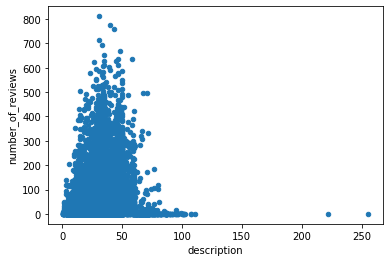

In [105]:
fig = plt.figure(figsize= (15, 8))
df.plot.scatter(x='description', y='number_of_reviews')

In [103]:
#Lets see if there is a correlation between price and the length of description
corr_1 = df['price'].corr(df['number_of_reviews']).round(3)
corr_1
#Even less correlation

-0.014

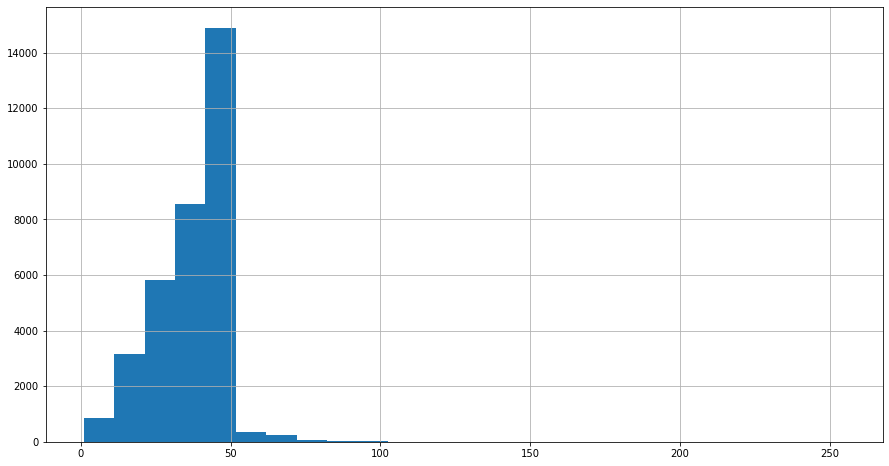

In [107]:
#Histogram of the length of descriptions
fig = plt.figure(figsize= (15, 8))
df.description.hist(bins=25)

In [108]:
df['room_type'].value_counts()

Entire home/apt    19824
Private room       12530
Shared room         1442
Hotel room           199
Name: room_type, dtype: int64

In [112]:
df.groupby('room_type')['price'].mean().round(3)

room_type
Entire home/apt    143.973
Hotel room          95.643
Private room        73.673
Shared room         39.567
Name: price, dtype: float64

In [113]:
df['minimum_nights'].describe().round(3)

count    33995.000
mean        11.464
std         22.291
min          1.000
25%          1.000
50%          2.000
75%         30.000
max       1000.000
Name: minimum_nights, dtype: float64

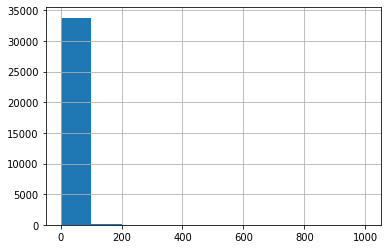

In [114]:
#Lets take a at the distribution of the amount of nights
df['minimum_nights'].hist()

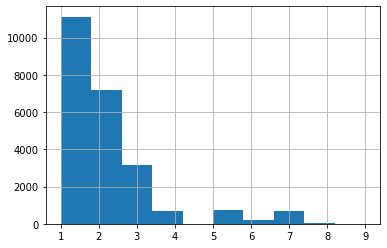

In [115]:
#A closer look
df['minimum_nights'][df['minimum_nights']<10].hist()

In [116]:
df['minimum_nights'].value_counts()

1      11125
2       7210
30      6928
3       3155
31      1913
       ...  
400        1
750        1
364        1
75         1
175        1
Name: minimum_nights, Length: 88, dtype: int64

In [117]:
#There are some outliers with more than 30 days. Lets set a cap to normalize the data
df.loc[(df['minimum_nights']>30), 'minimum_nights']=30

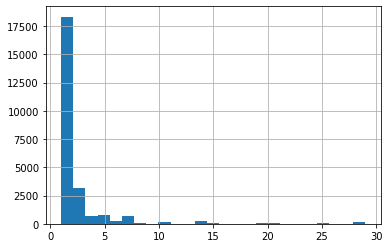

In [118]:
df['minimum_nights'][df['minimum_nights']<30].hist(bins=25)

In [120]:
#Is there a correlation between minimum nights and price?
df['minimum_nights'].corr(df['price']).round(3)

0.032

In [121]:
#Lets analyze the availability through the calendar year
df['availability_365'].describe().round(3)

count    33995.000
mean       160.713
std        135.587
min          0.000
25%         27.000
50%        138.000
75%        308.000
max        365.000
Name: availability_365, dtype: float64

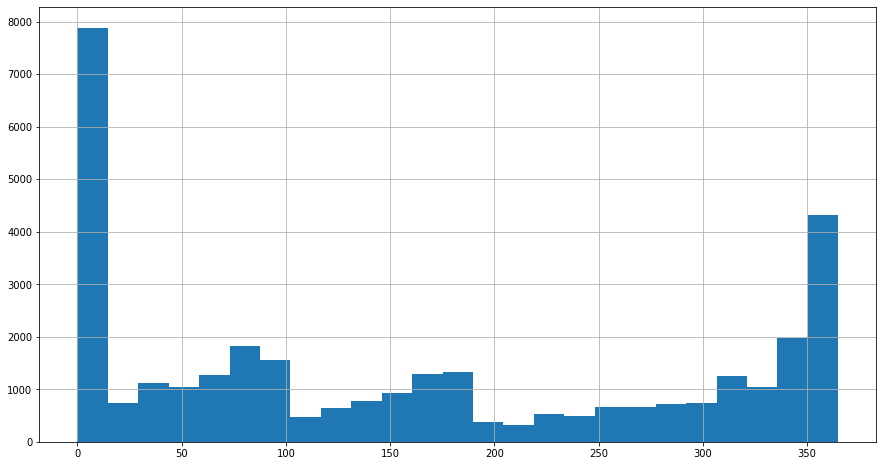

In [125]:
fig = plt.figure(figsize= (15, 8))
df['availability_365'].hist(bins=25)

In [168]:
availability = df.sort_values(by='availability_365')
availability['availability_365'].value_counts()

0      6811
365    1597
364     492
89      458
90      422
       ... 
200      16
189      16
210      15
203      15
220      14
Name: availability_365, Length: 366, dtype: int64

In [170]:
df

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,description
0,521,Other Cities,Culver City,Entire home/apt,122,30,2,0.02,1,0,50
1,767,Other Cities,Burbank,Entire home/apt,168,2,8,0.18,1,119,33
2,3008,City of Los Angeles,Hollywood,Private room,79,30,23,0.33,2,304,49
3,3041,Other Cities,Santa Monica,Private room,140,1,21,0.20,2,337,21
4,3207,Other Cities,Bellflower,Entire home/apt,80,2,0,0.00,1,0,49
...,...,...,...,...,...,...,...,...,...,...,...
38846,17739626,City of Los Angeles,Beverly Grove,Entire home/apt,265,30,0,0.00,9,361,42
38847,9745832,Unincorporated Areas,Marina del Rey,Entire home/apt,99,2,0,0.00,3,264,46
38848,293807554,Other Cities,Santa Monica,Entire home/apt,295,3,0,0.00,1,322,48
38849,27798046,Unincorporated Areas,Marina del Rey,Entire home/apt,199,2,0,0.00,1,164,34


In [172]:
#Lets drop some columns that aren't critical to our future model
#df.drop(['name', 'last_review', 'latitude', 'longitude'], axis=1, inplace=True)
df.drop('host_id', axis=1, inplace=True)

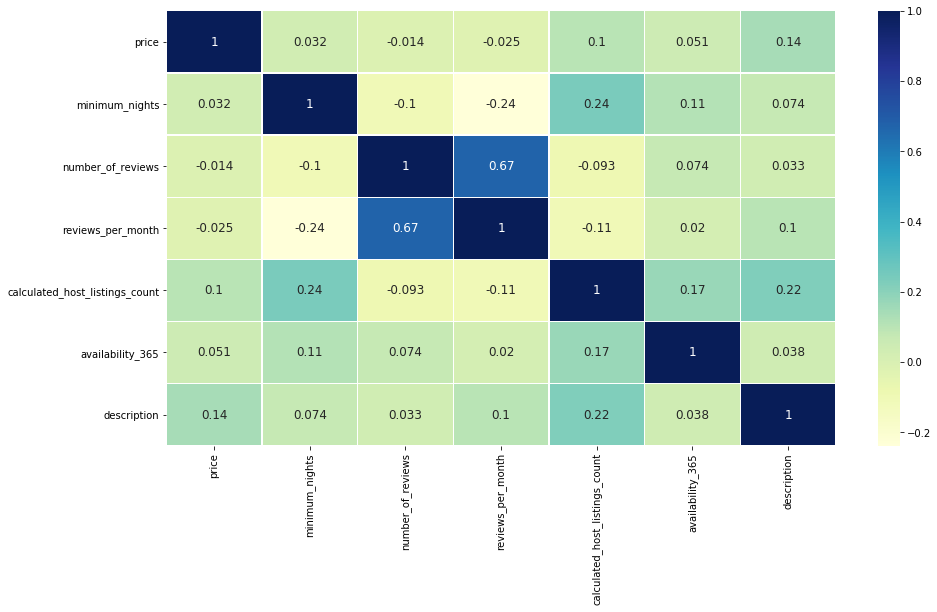

In [176]:
#Plot a correlation matrix
corr_mat = df.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr_mat,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 12})

In [179]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'description'],
      dtype='object')

In [180]:
df.dtypes

neighbourhood_group                object
neighbourhood                      object
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
description                         int64
dtype: object

# Basic Linear Regression Model

In [194]:
from sklearn import preprocessing, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [182]:
#Preprocess data
df_dummy = pd.get_dummies(df, columns=['neighbourhood_group', 'room_type'], prefix=['ng', 'rt'], drop_first=True)

In [183]:
df_dummy 

,neighbourhood,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,description,ng_Other Cities,ng_Unincorporated Areas,rt_Hotel room,rt_Private room,rt_Shared room
0,Culver City,122,30,2,0.02,1,0,50,1,0,0,0,0
1,Burbank,168,2,8,0.18,1,119,33,1,0,0,0,0
2,Hollywood,79,30,23,0.33,2,304,49,0,0,0,1,0
3,Santa Monica,140,1,21,0.20,2,337,21,1,0,0,1,0
4,Bellflower,80,2,0,0.00,1,0,49,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38846,Beverly Grove,265,30,0,0.00,9,361,42,0,0,0,0,0
38847,Marina del Rey,99,2,0,0.00,3,264,46,0,1,0,0,0
38848,Santa Monica,295,3,0,0.00,1,322,48,1,0,0,0,0
38849,Marina del Rey,199,2,0,0.00,1,164,34,0,1,0,0,0


In [186]:
df_dummy.drop(['neighbourhood'], axis=1, inplace=True)

In [187]:
df_dummy

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,description,ng_Other Cities,ng_Unincorporated Areas,rt_Hotel room,rt_Private room,rt_Shared room
0,122,30,2,0.02,1,0,50,1,0,0,0,0
1,168,2,8,0.18,1,119,33,1,0,0,0,0
2,79,30,23,0.33,2,304,49,0,0,0,1,0
3,140,1,21,0.20,2,337,21,1,0,0,1,0
4,80,2,0,0.00,1,0,49,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38846,265,30,0,0.00,9,361,42,0,0,0,0,0
38847,99,2,0,0.00,3,264,46,0,1,0,0,0
38848,295,3,0,0.00,1,322,48,1,0,0,0,0
38849,199,2,0,0.00,1,164,34,0,1,0,0,0


In [195]:
#Create your features training data
X = df_dummy.loc[:, df_dummy.columns != 'price']

In [196]:
X

,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,description,ng_Other Cities,ng_Unincorporated Areas,rt_Hotel room,rt_Private room,rt_Shared room
0,30,2,0.02,1,0,50,1,0,0,0,0
1,2,8,0.18,1,119,33,1,0,0,0,0
2,30,23,0.33,2,304,49,0,0,0,1,0
3,1,21,0.20,2,337,21,1,0,0,1,0
4,2,0,0.00,1,0,49,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
38846,30,0,0.00,9,361,42,0,0,0,0,0
38847,2,0,0.00,3,264,46,0,1,0,0,0
38848,3,0,0.00,1,322,48,1,0,0,0,0
38849,2,0,0.00,1,164,34,0,1,0,0,0


In [197]:
#Create target
y = df_dummy['price']

In [198]:
y

0        122
1        168
2         79
3        140
4         80
        ... 
38846    265
38847     99
38848    295
38849    199
38850     80
Name: price, Length: 33995, dtype: int64

In [199]:
#Split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [200]:
#Fit linear regression model
reg = LinearRegression().fit(x_train, y_train)

In [201]:
#R squared score
reg.score(x_train, y_train)

0.359995390930099

In [215]:
x_train.columns

Index(['minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365', 'description',
       'ng_Other Cities', 'ng_Unincorporated Areas', 'rt_Hotel room',
       'rt_Private room', 'rt_Shared room'],
      dtype='object')

In [216]:
reg.coef_

array([-5.28483187e-01, -5.69646613e-03, -4.00959186e+00,  7.75906040e-02,
        3.66089140e-02,  3.68847064e-01, -8.92612741e-01, -1.10538186e+01,
       -5.94472495e+01, -7.15318631e+01, -1.09651845e+02])

In [217]:
reg.coef_.shape

(11,)

In [218]:
#Predict
y_pred = reg.predict(x_test)
y_pred

array([143.91319768,  29.51611634, 166.65808789, ..., 147.58892626,
        80.12581503,  41.75706994])

In [219]:
y_pred.shape

(6799,)

In [222]:
Coefficient = pd.DataFrame(columns=['Variable', 'Coefficient'])
Coefficient['Variable']=x_train.columns
Coefficient['Coefficient']=reg.coef_
Coefficient

,Variable,Coefficient
0,minimum_nights,-0.528483
1,number_of_reviews,-0.005696
2,reviews_per_month,-4.009592
3,calculated_host_listings_count,0.077591
4,availability_365,0.036609
5,description,0.368847
6,ng_Other Cities,-0.892613
7,ng_Unincorporated Areas,-11.053819
8,rt_Hotel room,-59.447250
9,rt_Private room,-71.531863


In [223]:
#Sort Values
Coefficient.sort_values('Coefficient')

,Variable,Coefficient
10,rt_Shared room,-109.651845
9,rt_Private room,-71.531863
8,rt_Hotel room,-59.447250
7,ng_Unincorporated Areas,-11.053819
2,reviews_per_month,-4.009592
6,ng_Other Cities,-0.892613
0,minimum_nights,-0.528483
1,number_of_reviews,-0.005696
4,availability_365,0.036609
3,calculated_host_listings_count,0.077591


In [212]:
#Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse

51.41597546525654

In [225]:
#Closer look at our estimates
X1 = sm.add_constant(x_train)
est = sm.OLS(y_train, X1)
est2 = est.fit()
est2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1390.
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        22:13:30   Log-Likelihood:            -1.4559e+05
No. Observations:               27196   AIC:                         2.912e+05
Df Residuals:                   27184   BIC:                         2.913e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                            136.9793      1.225    111.787      0.000     134.578     139.381
minimum_nights                    -0.5285      0.027    -19.259      0.000      -0.582      -0.475
number_of_reviews                 -0.0057      0.006     -0.888      0.374      -0.018       0.007
reviews_per_month                 -4.0096      0.226    -17.770      0.000      -4.452      -3.567
calculated_host_listings_count     0.0776      0.014      5.741      0.000       0.051       0.104
availability_365                   0.0366      0.002     15.497      0.000       0.032       0.041
description                        0.3688      0.027     13.917      0.000       0.317       0.421
ng_Other Cities                   -0.8926      0.693     -1.288      0.198      -2.251       0.466
ng_Unincorporated Areas          -11.0538      1.227     -9.007      0.000     -13.459      -8.648
rt_Hotel room                    -59.4472      4.007    -14.838      0.000     -67.300     -51.594
rt_Private room                  -71.5319      0.676   -105.869      0.000     -72.856     -70.208
rt_Shared room                  -109.6518      1.594    -68.803      0.000    -112.776    -106.528
==============================================================================
Omnibus:                     3445.337   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5102.841
Skew:                           0.940   Prob(JB):                         0.00
Kurtosis:                       3.985   Cond. No.                     2.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Lets Make Another Model

In [230]:
df_dummy2 = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], prefix=['ng', 'nh', 'rt'], drop_first=True)
df_dummy2

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,description,ng_Other Cities,ng_Unincorporated Areas,nh_Adams-Normandie,...,nh_Westwood,nh_Whittier,nh_Willowbrook,nh_Wilmington,nh_Windsor Square,nh_Winnetka,nh_Woodland Hills,rt_Hotel room,rt_Private room,rt_Shared room
0,122,30,2,0.02,1,0,50,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,168,2,8,0.18,1,119,33,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,79,30,23,0.33,2,304,49,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,140,1,21,0.20,2,337,21,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,80,2,0,0.00,1,0,49,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38846,265,30,0,0.00,9,361,42,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38847,99,2,0,0.00,3,264,46,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38848,295,3,0,0.00,1,322,48,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38849,199,2,0,0.00,1,164,34,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
XL1 = df_dummy2.loc[:, df_dummy2.columns != 'price']
YL1 = df_dummy2['price']

In [233]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(XL1, YL1, test_size=0.20, random_state=42)

In [236]:
#Lets now use Lasso Regression to nullify parameters that do not make this model more accurate. 
reg_lasso = Lasso(alpha=0.1)
reg_lasso.fit(x_train2, y_train2)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [239]:
#R squared
reg_lasso.score(x_train2, y_train2)
#It looks like this regression model is a little bit more accurate

0.40709906689262787

In [240]:
#RMSE 
y_pred2 = reg_lasso.predict(x_test2)
rmse = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
rmse

49.650783919261194

In [241]:
reg_lasso.coef_

array([-6.20930077e-01, -2.41631233e-02, -3.47832912e+00,  5.21802206e-02,
        3.91279013e-02,  3.19045758e-01, -5.72976182e-01, -5.84039988e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -1.42746913e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  4.91911692e+01, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.44611244e+01,
        1.74171642e+01, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        1.50566398e-01, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -

In [243]:
CoeffLasso = pd.DataFrame(columns=['Variable', 'Coefficients'])
CoeffLasso['Variable']=x_train2.columns
CoeffLasso['Coefficients']=reg_lasso.coef_
CoeffLasso.sort_values('Coefficients', ascending=False)

,Variable,Coefficients
21,nh_Avalon,49.191169
142,nh_Malibu,39.443108
240,nh_Venice,35.883680
144,nh_Manhattan Beach,32.489858
146,nh_Marina del Rey,29.756836
...,...,...
114,nh_Inglewood,-6.911050
191,nh_Rowland Heights,-10.666213
271,rt_Hotel room,-39.231012
272,rt_Private room,-67.993801


In [246]:
X2 = sm.add_constant(x_train2)
est3 = sm.OLS(y_train2, X2)
est4 = est3.fit()
est4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     77.10
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        22:58:49   Log-Likelihood:            -1.4384e+05
No. Observations:               27196   AIC:                         2.882e+05
Df Residuals:                   26924   BIC:                         2.905e+05
Df Model:                         271                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                      128.1390      1.438     89.081      0.000     125.320     130.958
minimum_nights                              -0.7224      0.027    -26.706      0.000      -0.775      -0.669
number_of_reviews                           -0.0467      0.006     -7.572      0.000      -0.059      -0.035
reviews_per_month                           -2.8572      0.217    -13.190      0.000      -3.282      -2.433
calculated_host_listings_count               0.0452      0.013      3.458      0.001       0.020       0.071
availability_365                             0.0444      0.002     19.584      0.000       0.040       0.049
description                                  0.2529      0.026      9.908      0.000       0.203       0.303
ng_Other Cities                              0.3014      1.842      0.164      0.870      -3.309       3.911
ng_Unincorporated Areas                      9.0086     21.387      0.421      0.674     -32.911      50.928
nh_Adams-Normandie                           0.8251      7.808      0.106      0.916     -14.480      16.130
nh_Agoura Hills                             13.1981      8.707      1.516      0.130      -3.869      30.265
nh_Agua Dulce                              -21.2259     26.398     -0.804      0.421     -72.967      30.515
nh_Alhambra                                 -8.9203      3.405     -2.620      0.009     -15.595      -2.246
nh_Alondra Park                             11.8093     25.111      0.470      0.638     -37.410      61.029
nh_Altadena                                -15.7796     21.873     -0.721      0.471     -58.653      27.094
nh_Angeles Crest                             4.1039     32.333      0.127      0.899     -59.271      67.479
nh_Arcadia                                  13.5685      4.108      3.303      0.001       5.517      21.620
nh_Arleta                                  -46.0018     23.907     -1.924      0.054     -92.861       0.857
nh_Arlington Heights                        -3.6371      4.553     -0.799      0.424     -12.561       5.287
nh_Artesia                                 -10.8711     12.021     -0.904      0.366     -34.433      12.691
nh_Athens                                   19.3892     30.482      0.636      0.525     -40.357      79.135
nh_Atwater Village                          13.2472      5.154      2.570      0.010       3.146      23.349
nh_Avalon                                  102.4313      6.526     15.695      0.000      89.639     115.223
nh_Avocado Heights                         -28.6456     25.657     -1.117      0.264     -78.934      21.643
nh_Azusa                                     7.0865      6.800      1.042      0.297      -6.242      20.415
nh_Baldwin Hills/Crenshaw      

# Random Forest Regressor 

In [248]:
regRM = RandomForestRegressor(n_estimators=300)
regRM.fit(x_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [250]:
regRM.score(x_train2, y_train2)

0.927694464081518

In [254]:
y_pred3 = regRM.predict(x_test2)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred3)))

46.44524826938447


In [256]:
#Find out which features have the most weight
regRM.feature_importances_

array([3.45897914e-02, 6.39402819e-02, 8.94935924e-02, 6.06033341e-02,
       8.56886425e-02, 8.21581039e-02, 1.00987864e-02, 3.74762855e-03,
       4.44985799e-04, 5.45324665e-04, 3.82186556e-05, 1.30938577e-03,
       3.91889501e-04, 8.97093485e-04, 2.78142505e-05, 1.58787950e-03,
       2.54019772e-05, 2.84319392e-04, 5.67656918e-05, 1.11533261e-04,
       1.12602626e-03, 6.08712686e-03, 3.00312456e-05, 5.38016376e-04,
       9.52157594e-04, 2.10781194e-04, 2.47383436e-04, 7.08325321e-07,
       8.69916130e-06, 1.83230351e-04, 1.03845396e-03, 5.28237276e-03,
       3.73068010e-03, 1.62010060e-04, 6.36462876e-04, 6.85246115e-05,
       1.98347975e-03, 3.33577442e-05, 1.87773086e-03, 5.00787795e-04,
       6.76008434e-04, 3.02999998e-04, 1.15138561e-03, 5.36325330e-05,
       1.51706731e-04, 5.69498773e-05, 1.99953182e-04, 7.90896640e-05,
       2.70516258e-05, 2.61028781e-04, 0.00000000e+00, 1.40355999e-04,
       4.77477313e-04, 3.14510167e-04, 8.75407654e-06, 3.74871636e-04,
      

In [257]:
CoeffRM = pd.DataFrame(columns=['Variable', 'Feature Importance'])
CoeffRM['Variable']=x_train2.columns
CoeffRM['Feature Importance']=regRM.feature_importances_
CoeffRM.sort_values('Feature Importance', ascending=False)

,Variable,Feature Importance
272,rt_Private room,2.246498e-01
273,rt_Shared room,1.026832e-01
2,reviews_per_month,8.949359e-02
4,availability_365,8.568864e-02
5,description,8.215810e-02
...,...,...
139,nh_Lopez/Kagel Canyons,1.051533e-06
202,nh_Sepulveda Basin,7.263257e-07
27,nh_Bell,7.083253e-07
208,nh_South Diamond Bar,3.085488e-07


In [260]:
regRM.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [262]:
#Lets look into Over fitting
regRM2 = RandomForestRegressor(n_estimators=200, max_depth=50, min_samples_split=5, min_samples_leaf=4)
regRM2.fit(x_train2, y_train2)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [271]:
print(regRM2.score(x_train2, y_train2).round(4))

0.7524


In [272]:
y_pred4 = regRM2.predict(x_test2)
print(np.sqrt(metrics.mean_squared_error(y_test2, y_pred4).round(4)))

46.90030063869527


In [273]:
CoeffRM2 = pd.DataFrame(columns=['Variable', 'Feature Importance'])
CoeffRM2['Variable']=x_train2.columns
CoeffRM2['Feature Importance']=regRM2.feature_importances_
CoeffRM2.sort_values('Feature Importance', ascending=False)

,Variable,Feature Importance
272,rt_Private room,0.291220
273,rt_Shared room,0.133057
2,reviews_per_month,0.098842
4,availability_365,0.094694
5,description,0.082578
...,...,...
119,nh_La Crescenta-Montrose,0.000000
120,nh_La Habra Heights,0.000000
199,nh_Santa Fe Springs,0.000000
121,nh_La Mirada,0.000000


# Listings during LockDowns in LA

In [133]:
feb = df[df['price']<300]
len(feb)

33995

In [134]:
feb['price'].describe()

count    33995.000000
mean       113.350051
std         64.053370
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

In [135]:
april = pd.read_csv('april_2020_listings.csv')

In [136]:
april_covid = april[april['price']<300]
len(april_covid)

33174

In [137]:
april_covid['price'].describe()

count    33174.000000
mean       112.724845
std         63.571078
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

In [138]:
may = pd.read_csv('may_2020_listings.csv')

In [139]:
may_covid = may[may['price']<300]

In [140]:
may_covid['price'].describe()

count    32518.000000
mean       112.433145
std         63.235436
min          0.000000
25%         65.000000
50%         99.000000
75%        150.000000
max        299.000000
Name: price, dtype: float64

# Analysis of Some Areas in LA 

In [141]:
#Indexing
df_ind = df.set_index('neighbourhood')
df_nbh = df_ind.loc[['Venice', 'Hollywood', 'Long Beach', 'Hollywood', "Downtown", 'Santa Monica', 
                     'Pasadena', 'South Pasadena', 'Alhambra']]
df_nbh.shape

(10040, 14)

In [226]:
df_nbh

,name,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,description
neighbourhood,,,,,,,,,,,,,,
Venice,Cozy Guest House on Venice Walk St.,26996,City of Los Angeles,33.99399,-118.45637,Entire home/apt,121,3,400,2020-01-29,3.21,1,361,35
Venice,"Bright Apt, walk to Venice Beach",30319,City of Los Angeles,33.99638,-118.47734,Private room,85,30,46,2019-11-04,0.36,2,357,32
Venice,Le petit bungalow private entrance + bikes in VB,30484,City of Los Angeles,33.99753,-118.47226,Entire home/apt,90,30,45,2019-11-12,0.44,2,5,48
Venice,Venice Beach Walkstreet Getaway,60473,City of Los Angeles,33.99359,-118.46049,Entire home/apt,140,2,811,2020-02-07,6.61,1,237,31
Venice,Bohemian home w/rooftop jacuzzi & tiki bar,69546,City of Los Angeles,33.99065,-118.44962,Entire home/apt,200,1,48,2019-11-08,0.49,3,10,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Alhambra,Prime Location 2Bed/1Bath private entrance! B,50488861,Other Cities,34.07499,-118.12387,Entire home/apt,105,1,0,not_reviewed,0.00,8,265,45
Alhambra,POP UP IN SGV WELCOME!!NEW YEARS CHEERS,311494653,Other Cities,34.09501,-118.12469,Entire home/apt,250,3,0,not_reviewed,0.00,1,179,39
Alhambra,"Mission Flats 2, amazing location nr Downtown LA!",332321860,Other Cities,34.09390,-118.13202,Entire home/apt,99,2,0,not_reviewed,0.00,1,160,49


# Create Sample DataFrames, Aggregate Data, and Statistical Analysis

In [143]:
pasadena = df_ind.loc['Pasadena']
pasadena.shape

(504, 14)

In [144]:
alhambra = df_ind.loc['Alhambra']
alhambra.shape

(323, 14)

In [145]:
downtown = df_ind.loc['Downtown']
downtown.shape

(1224, 14)

In [146]:
south_pasadena = df_ind.loc['South Pasadena']
south_pasadena.shape

(68, 14)

In [147]:
south_pasadena[south_pasadena['price']>500]

,name,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,description
neighbourhood,,,,,,,,,,,,,,


In [148]:
south_pasadena['price'].value_counts()

85     5
75     4
150    4
130    4
95     3
200    3
115    2
135    2
125    2
88     2
90     2
199    2
99     2
100    2
120    2
92     1
55     1
105    1
139    1
275    1
71     1
155    1
40     1
47     1
175    1
50     1
179    1
53     1
65     1
61     1
97     1
68     1
69     1
70     1
112    1
76     1
205    1
78     1
80     1
118    1
87     1
127    1
Name: price, dtype: int64

In [149]:
south_pasadena['room_type'].value_counts()

Entire home/apt    46
Private room       21
Hotel room          1
Name: room_type, dtype: int64

In [150]:
santa_monica = df_ind.loc['Santa Monica']
santa_monica.shape

(1135, 14)

In [151]:
holly_wood = df_ind.loc['Hollywood']
holly_wood.shape

(1782, 14)

In [152]:
venice = df_ind.loc['Venice']
venice.shape

(1535, 14)

In [153]:
avg_nbh_price = df.pivot_table(values='price', index='neighbourhood')
avg_nbh_price

,price
neighbourhood,
Acton,109.800000
Adams-Normandie,82.744681
Agoura Hills,107.756757
Agua Dulce,92.636364
Alhambra,87.863777
...,...
Willowbrook,111.000000
Wilmington,63.029412
Windsor Square,112.459459


In [154]:
avg_nbh_stats = df.pivot_table(values='price', index='neighbourhood', 
                               aggfunc=[np.min, np.max, np.mean, np.median])
avg_nbh_stats

,amin,amax,mean,median
,price,price,price,price
neighbourhood,,,,
Acton,30,255,109.800000,95.0
Adams-Normandie,25,299,82.744681,60.0
Agoura Hills,40,299,107.756757,75.0
Agua Dulce,55,200,92.636364,75.0
Alhambra,10,299,87.863777,67.0
...,...,...,...,...
Willowbrook,25,299,111.000000,75.0
Wilmington,45,139,63.029412,61.0


In [155]:
#nbh_rentals = df.pivot(values=[['price', 'room_type']], index='neighbourhood')

In [156]:
new_nbh_stats = df_nbh.pivot_table(values='price', index='neighbourhood', 
                               aggfunc=[np.min, np.max, np.mean, np.median])
new_nbh_stats

,amin,amax,mean,median
,price,price,price,price
neighbourhood,,,,
Alhambra,10,299,87.863777,67
Downtown,19,299,141.124183,135
Hollywood,10,299,123.840629,110
Long Beach,0,299,111.816835,99
Pasadena,17,299,118.777778,105
Santa Monica,35,299,147.200881,135
South Pasadena,40,275,112.073529,99
Venice,39,299,154.791531,145


In [157]:
price_avgs_per_room = df_ind.pivot_table('price', index='neighbourhood', columns=['room_type'])
price_avgs_per_room

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Acton,97.000000,NaN,118.333333,NaN
Adams-Normandie,140.666667,NaN,62.885714,NaN
Agoura Hills,183.461538,NaN,66.750000,NaN
Agua Dulce,115.833333,NaN,64.800000,NaN
Alhambra,133.281690,NaN,52.235955,52.000000
...,...,...,...,...
Willowbrook,176.250000,NaN,56.500000,25.000000
Wilmington,76.555556,61.533333,53.100000,NaN
Windsor Square,144.857143,NaN,83.000000,41.200000


In [158]:
#Dropping "Hotel room" column
avg_prices = price_avgs_per_room.drop(columns='Hotel room')
avg_prices

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Acton,97.000000,118.333333,NaN
Adams-Normandie,140.666667,62.885714,NaN
Agoura Hills,183.461538,66.750000,NaN
Agua Dulce,115.833333,64.800000,NaN
Alhambra,133.281690,52.235955,52.000000
...,...,...,...
Willowbrook,176.250000,56.500000,25.000000
Wilmington,76.555556,53.100000,NaN
Windsor Square,144.857143,83.000000,41.200000


In [159]:
new_nbh_stats_2 = df_nbh.pivot_table('price', index='neighbourhood', columns=['room_type'])
new_nbh_stats_2

room_type,Entire home/apt,Hotel room,Private room,Shared room
neighbourhood,,,,
Alhambra,133.281690,NaN,52.235955,52.000000
Downtown,154.748132,104.714286,102.105727,50.843750
Hollywood,140.985441,85.461538,81.035443,51.855072
Long Beach,131.949458,119.333333,70.256674,52.048780
Pasadena,145.244300,160.000000,77.628272,57.400000
Santa Monica,164.428398,173.333333,105.806338,42.291667
South Pasadena,120.956522,135.000000,91.523810,NaN
Venice,170.498741,122.000000,104.612903,56.290323


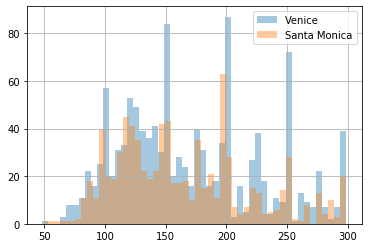

In [160]:
#Historgram of Entire Home/Apartment based on Price in Venice and Santa Monica
venice[venice['room_type'] == 'Entire home/apt']['price'].hist(alpha=0.4, bins=50)
santa_monica[santa_monica['room_type'] == 'Entire home/apt']['price'].hist(alpha=0.4, bins=50)
plt.legend(['Venice', 'Santa Monica'])
plt.show()

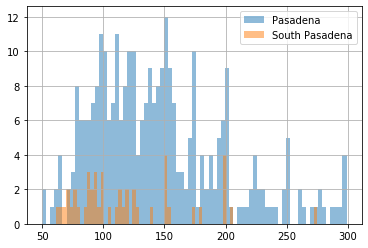

In [161]:
#Histogram on Entire Home/Apartment based on Price in Pasadena and South Pasadena
pasadena[pasadena['room_type'] == 'Entire home/apt']['price'].hist(alpha=0.5, bins=75)
south_pasadena[south_pasadena['room_type'] == 'Entire home/apt']['price'].hist(alpha=0.5, bins=75)
plt.legend(['Pasadena', 'South Pasadena'])
plt.show()

In [162]:
new_nbh_stats_3 = df_nbh.pivot_table('price', index='neighbourhood', columns=['room_type'], 
                                     aggfunc=[np.mean, np.min, np.max, np.median])
new_nbh_stats_3

mean                                       \
room_type      Entire home/apt  Hotel room Private room Shared room   
neighbourhood                                                         
Alhambra            133.281690         NaN    52.235955   52.000000   
Downtown            154.748132  104.714286   102.105727   50.843750   
Hollywood           140.985441   85.461538    81.035443   51.855072   
Long Beach          131.949458  119.333333    70.256674   52.048780   
Pasadena            145.244300  160.000000    77.628272   57.400000   
Santa Monica        164.428398  173.333333   105.806338   42.291667   
South Pasadena      120.956522  135.000000    91.523810         NaN   
Venice              170.498741  122.000000   104.612903   56.290323   

                          amin                                      \
room_type      Entire home/apt Hotel room Private room Shared room   
neighbourhood                                                        
Alhambra                  43.0        NaN         10.0        39.0   
Downtown                  25.0       40.0         23.0        19.0   
Hollywood                 10.0       35.0         20.0        17.0   
Long Beach                13.0       76.0          0.0        10.0   
Pasadena                  50.0      160.0         28.0        17.0   
Santa Monica              50.0      150.0         39.0        35.0   
South Pasadena            61.0      135.0         40.0         NaN   
Venice                    48.0       60.0         40.0        39.0   

                          amax                                      \
room_type      Entire home/apt Hotel room Private room Shared room   
neighbourhood                                                        
Alhambra                 299.0        NaN        228.0        67.0   
Downtown                 299.0      299.0        299.0       250.0   
Hollywood                299.0      239.0        299.0       221.0   
Long Beach               299.0      249.0        280.0       260.0   
Pasadena                 299.0      160.0        250.0        95.0   
Santa Monica             299.0      195.0        299.0        61.0   
South Pasadena           275.0      135.0        200.0         NaN   
Venice                   299.0      226.0        299.0       143.0   

                        median                                      
room_type      Entire home/apt Hotel room Private room Shared room  
neighbourhood                                                       
Alhambra                 118.5        NaN         46.0        50.0  
Downtown                 149.0       95.5         85.0        35.5  
Hollywood                127.0       65.0         70.0        39.0  
Long Beach               120.0       99.0         63.0        35.0  
Pasadena                 139.0      160.0         74.0        50.0  
Santa Monica             150.0      175.0         99.0        40.0  
South Pasadena           108.5      135.0         85.0         NaN  
Venice                   159.0       80.0         99.0        49.0

In [163]:
df_nbh.columns

Index(['name', 'host_id', 'neighbourhood_group', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'description'],
      dtype='object')

In [164]:
#Get percentage and ratio of room_types